In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import adjusted_rand_score
from sklearn.metrics import fbeta_score
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN
from sklearn.neighbors import NearestNeighbors
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler

import time

In [18]:
# Load the dataset
df = pd.read_csv('creditcard.csv')

In [26]:
# inspect the dataset
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [24]:
df.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [27]:
# Check for missing values
missing_values = df.isnull().sum()

# Check if there are any missing values
if missing_values.sum() > 0:
    print("Dataset contains missing values.")
    print(missing_values)
else:
    print("No missing values in the dataset.")

No missing values in the dataset.


In [28]:
# Check the data types of columns
data_types = df.dtypes

# Print the data types
print(data_types)

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object


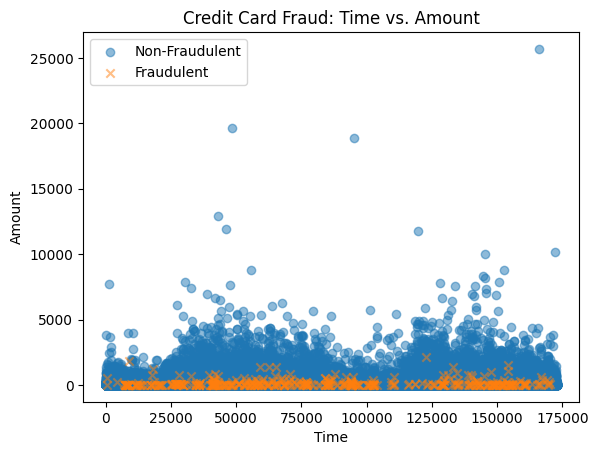

In [29]:

x = df.drop('Class', axis=1)
y = df['Class']


# Plot 'Time', 'Amount', and 'Class'
plt.scatter(x.loc[y == 0, 'Time'], x.loc[y == 0, 'Amount'], label='Non-Fraudulent', alpha=0.5, marker='o')
plt.scatter(x.loc[y == 1, 'Time'], x.loc[y == 1, 'Amount'], label='Fraudulent', alpha=0.5, marker='x')

plt.xlabel('Time')
plt.ylabel('Amount')
plt.title('Credit Card Fraud: Time vs. Amount')
plt.legend()
plt.show()

In [9]:
# Clustering with k-means


# Calculate the Hopkins statistic
def hopkins_statistic(X, n_samples=100):
    n = X.shape[0]
    d = X.shape[1]
    nbrs = NearestNeighbors(n_neighbors=1).fit(X)

    rand_X = np.random.rand(n_samples, d)
    dist_rand = nbrs.kneighbors(rand_X, return_distance=True)[0]

    dist_X = nbrs.kneighbors(X, return_distance=True)[0]

    u = sum(dist_X) / (sum(dist_X) + sum(dist_rand))

    return u

# hopkins_score = hopkins_statistic(x)
# print("Hopkins statistic before oversampling: ", hopkins_score)

kmeans = KMeans(n_clusters=2, random_state=42, n_init="auto")
cluster_assignments = kmeans.fit_predict(x)

# evaluating our K-means model
Ari = adjusted_rand_score(y, cluster_assignments)
print("Original Dataset Rand index: ", Ari)

# Count the occurrences of each target type in clusters
temp = pd.DataFrame({'Cluster': cluster_assignments, 'Target': y})
target_counts = temp.groupby(['Cluster', 'Target']).size().reset_index(name='Count')
print(target_counts)



oversampler = RandomOverSampler(random_state=42)
x_resampled, y_resampled = oversampler.fit_resample(x, y)
# hopkins_score = hopkins_statistic(x_resampled)
# print("Hopkins statistic after RANDOM Oversampling: ", hopkins_score)

kmeans = KMeans(n_clusters=2, random_state=42, n_init="auto")
cluster_assignments = kmeans.fit_predict(x_resampled)

# evaluating our K-means model
Ari = adjusted_rand_score(y_resampled, cluster_assignments)
print("Random oversampling Rand index: ", Ari)

# Count the occurrences of each target type in clusters
temp = pd.DataFrame({'Cluster': cluster_assignments, 'Target': y_resampled})
target_counts = temp.groupby(['Cluster', 'Target']).size().reset_index(name='Count')
print(target_counts)



oversampler = SMOTE(random_state=42)
x_resampled, y_resampled = oversampler.fit_resample(x, y)

kmeans = KMeans(n_clusters=2, random_state=42, n_init="auto")
cluster_assignments = kmeans.fit_predict(x_resampled)
# hopkins_score = hopkins_statistic(x_resampled)
# print("Hopkins statistic after SMOTE Oversampling: ", hopkins_score)

# evaluating our K-means model
Ari = adjusted_rand_score(y_resampled, cluster_assignments)
print("SMOTE oversampling Rand index: ", Ari)

# Count the occurrences of each target type in clusters
temp = pd.DataFrame({'Cluster': cluster_assignments, 'Target': y_resampled})
target_counts = temp.groupby(['Cluster', 'Target']).size().reset_index(name='Count')
print(target_counts)



oversampler = ADASYN(random_state=42)
x_resampled, y_resampled = oversampler.fit_resample(x, y)

kmeans = KMeans(n_clusters=2, random_state=42, n_init="auto")
cluster_assignments = kmeans.fit_predict(x_resampled)
# hopkins_score = hopkins_statistic(x_resampled)
# print("Hopkins statistic after ADASYN Oversampling: ", hopkins_score)

# evaluating our K-means model
Ari = adjusted_rand_score(y_resampled, cluster_assignments)
print("ADASYN oversampling Rand index: ", Ari)

# Count the occurrences of each target type in clusters
temp = pd.DataFrame({'Cluster': cluster_assignments, 'Target': y_resampled})
target_counts = temp.groupby(['Cluster', 'Target']).size().reset_index(name='Count')
print(target_counts)
print("#################################################################################################")

Original Dataset Rand index:  -0.00013831210774407722
   Cluster  Target   Count
0        0       0  152833
1        0       1     330
2        1       0  131482
3        1       1     162
Random oversampling Rand index:  0.0175809426542466
   Cluster  Target   Count
0        0       0  132807
1        0       1   95107
2        1       0  151508
3        1       1  189208
SMOTE oversampling Rand index:  0.017265231642433897
   Cluster  Target   Count
0        0       0  132798
1        0       1   95438
2        1       0  151517
3        1       1  188877
ADASYN oversampling Rand index:  0.009126096515091798
   Cluster  Target   Count
0        0       0  133235
1        0       1  106064
2        1       0  151080
3        1       1  178234
#################################################################################################


In [35]:
# # Classification by SVM with the original data

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=42,stratify=y,shuffle=True)

scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train))
X_test = pd.DataFrame(scaler.transform(X_test))

# Define the parameter grid for GridSearchCV
param_grid = {'C': [0.1, 1, 10],
              'gamma': [0.001, 0.01, 0.1],
              'kernel': ["rbf"]}


# Create an instance of the SVM model
model = SVC()

# Create GridSearchCV object
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='f1', n_jobs=10)

# Fit the training data to perform grid search
grid_search.fit(X_train, y_train)

# Get the best model and its hyperparameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# Print the results
print("Best Hyperparameters:")
print(best_params)
print("Classification Report:")
print(classification_report(y_test, best_model.predict(X_test)))
print("Confusion Matrix:")
print(confusion_matrix(y_test, best_model.predict(X_test)))

Best Hyperparameters:
{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.93      0.81      0.86        98

    accuracy                           1.00     56962
   macro avg       0.96      0.90      0.93     56962
weighted avg       1.00      1.00      1.00     56962

Confusion Matrix:
[[56858     6]
 [   19    79]]


In [31]:
# Classification by SVM with RANDOM UnderSampling

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=42,stratify=y,shuffle=True)

param_grid = {'C': [0.01, 0.1, 1, 10, 100],
              'gamma': [0.0001, 0.001, 0.01, 0.1],
              'kernel': ['rbf', 'poly', 'linear']}

# Perform random undersampling
rus = RandomUnderSampler(random_state=42)
X_train_undersampled, y_train_undersampled = rus.fit_resample(X_train, y_train)

# Normalize the features
scaler = MinMaxScaler()
X_train_undersampled = pd.DataFrame(scaler.fit_transform(X_train_undersampled))
X_test = pd.DataFrame(scaler.transform(X_test))

# Create an instance of the SVM model
model = SVC()

# Create GridSearchCV object
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=10)

# Fit the training data to perform grid search
grid_search.fit(X_train_undersampled, y_train_undersampled)

# Get the best model and its hyperparameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_
y_pred = best_model.predict(X_test)

# Print the results
print("Best Hyperparameters:")
print(best_params)
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Best Hyperparameters:
{'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.98     56864
           1       0.05      0.92      0.09        98

    accuracy                           0.97     56962
   macro avg       0.52      0.94      0.54     56962
weighted avg       1.00      0.97      0.98     56962

Confusion Matrix:
[[55075  1789]
 [    8    90]]


In [37]:
# Classification by SVM with SMOTE OverSampling


# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=42,stratify=y,shuffle=True)


# Define the parameter grid for GridSearchCV
param_grid = {'C': [0.1, 1, 10],
              'gamma': [0.001, 0.01, 0.1],
              'kernel': ['rbf']}

# Perform SMOTE overSampling
rus = SMOTE(random_state=42)
X_train_oversampled, y_train_oversampled = rus.fit_resample(X_train, y_train)

# Normalize the features
scaler = MinMaxScaler()
X_train_oversampled = pd.DataFrame(scaler.fit_transform(X_train_oversampled))
X_test = pd.DataFrame(scaler.transform(X_test))

temp1, X_train_oversampled_subset, temp2, y_train_oversampled_subset = train_test_split\
    (X_train_oversampled, y_train_oversampled, test_size=0.1,random_state=42,stratify=y_train_oversampled,shuffle=True)


# Create an instance of the SVM model
model = SVC()

# Create GridSearchCV object
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='f1', n_jobs=10)

# Fit the training data to perform grid search
grid_search.fit(X_train_oversampled_subset, y_train_oversampled_subset)

# Get the best model and its hyperparameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_
y_pred = best_model.predict(X_test)

# Print the results
print("Best Hyperparameters:")
print(best_params)
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Best Hyperparameters:
{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     56864
           1       0.14      0.89      0.25        98

    accuracy                           0.99     56962
   macro avg       0.57      0.94      0.62     56962
weighted avg       1.00      0.99      0.99     56962

Confusion Matrix:
[[56346   518]
 [   11    87]]


In [32]:
# Logistic Regression with the original data

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=42,stratify=y,shuffle=True)

# scaler = MinMaxScaler()
# X_train = pd.DataFrame(scaler.fit_transform(X_train))
# X_test = pd.DataFrame(scaler.fit_transform(X_test))

# Define the parameter grid for GridSearchCV
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100]
}

# Create an instance of the SVM model
model = LogisticRegression()

# Create GridSearchCV object
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='f1', n_jobs=10)

# Fit the training data to perform grid search
grid_search.fit(X_train, y_train)

# Get the best model and its hyperparameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_
y_pred = best_model.predict(X_test)

# Print the results
print("Best Hyperparameters:")
print(best_params)
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

C:\Users\V.V\Documents\PycharmProjects\GeneralENV\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
30 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\V.V\Documents\PycharmProjects\GeneralENV\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\V.V\Documents\PycharmProjects\GeneralENV\Lib\site-packages\sklearn\base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\V.V\Documents\PycharmProjec

Best Hyperparameters:
{'C': 100, 'penalty': 'l2'}
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.75      0.78      0.76        98

    accuracy                           1.00     56962
   macro avg       0.87      0.89      0.88     56962
weighted avg       1.00      1.00      1.00     56962

Confusion Matrix:
[[56838    26]
 [   22    76]]


C:\Users\V.V\Documents\PycharmProjects\GeneralENV\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [33]:
# Logistic Regression with RANDOM UnderSampling

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=42,stratify=y,shuffle=True)

# # Normalize the features
# scaler = MinMaxScaler()
# X_train = pd.DataFrame(scaler.fit_transform(X_train))
# X_test = pd.DataFrame(scaler.transform(X_test))

# Define the parameter grid for GridSearchCV
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100]
}

# Perform random undersampling
rus = RandomUnderSampler(random_state=42)
X_train_undersampled, y_train_undersampled = rus.fit_resample(X_train, y_train)

# Create an instance of the Logistic Regression model
model = LogisticRegression()

# Create GridSearchCV object
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='f1', n_jobs=10)

# Fit the training data to perform grid search
grid_search.fit(X_train_undersampled, y_train_undersampled)

# Get the best model and its hyperparameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_
y_pred = best_model.predict(X_test)

# Print the results
print("Best Hyperparameters:")
print(best_params)
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Best Hyperparameters:
{'C': 0.1, 'penalty': 'l2'}
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.96      0.98     56864
           1       0.04      0.92      0.07        98

    accuracy                           0.96     56962
   macro avg       0.52      0.94      0.53     56962
weighted avg       1.00      0.96      0.98     56962

Confusion Matrix:
[[54555  2309]
 [    8    90]]


C:\Users\V.V\Documents\PycharmProjects\GeneralENV\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
30 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\V.V\Documents\PycharmProjects\GeneralENV\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\V.V\Documents\PycharmProjects\GeneralENV\Lib\site-packages\sklearn\base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\V.V\Documents\PycharmProjec

In [34]:
# Logistic Regression with SMOTE OverSampling


# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=42,stratify=y,shuffle=True)

# # Normalize the features
# scaler = MinMaxScaler()
# X_train = pd.DataFrame(scaler.fit_transform(X_train))
# X_test = pd.DataFrame(scaler.transform(X_test))

# Define the parameter grid for GridSearchCV
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100]
}

# Perform SMOTE overSampling
rus = SMOTE(random_state=42)
X_train_oversampled, y_train_oversampled = rus.fit_resample(X_train, y_train)


# Create an instance of the SVM model
model = LogisticRegression()

# Create GridSearchCV object
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='f1', n_jobs=10)

# Fit the training data to perform grid search
grid_search.fit(X_train_oversampled, y_train_oversampled)

# Get the best model and its hyperparameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_
y_pred = best_model.predict(X_test)

# Print the results
print("Best Hyperparameters:")
print(best_params)
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

C:\Users\V.V\Documents\PycharmProjects\GeneralENV\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
30 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\V.V\Documents\PycharmProjects\GeneralENV\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\V.V\Documents\PycharmProjects\GeneralENV\Lib\site-packages\sklearn\base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\V.V\Documents\PycharmProjec

Best Hyperparameters:
{'C': 10, 'penalty': 'l2'}
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56864
           1       0.07      0.91      0.12        98

    accuracy                           0.98     56962
   macro avg       0.53      0.94      0.56     56962
weighted avg       1.00      0.98      0.99     56962

Confusion Matrix:
[[55591  1273]
 [    9    89]]
